# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math


In [2]:
data_origin = pd.read_csv("vgames2.csv")

In [3]:
data_origin.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
data_origin.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

---

# 2. Preprocessing

> ## 2.1 Delete null & duplicates

In [5]:
data_origin=data_origin.drop(columns=['Unnamed: 0'])

In [6]:
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
data_origin.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
data_origin[data_origin.Year.isnull()].sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4617,Hangman,2600,NaN,Puzzle,Atari,350K,0.02,0,0
5309,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0,0.16
11125,Dragster,2600,NaN,Racing,Activision,0.3,0.02,0,0
7774,Saint,Wii,NaN,Shooter,Unknown,20K,0,0,0
11145,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0,0,0
11641,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0,0,0.01,0
9082,Big Beach Sports 2,Wii,NaN,Sports,THQ,0.09,0.12,0,0.03
1509,Flip's Twisted World,Wii,NaN,Platform,Unknown,0.05,0,0,0
1285,Mega Man X Collection,PS2,NaN,Misc,Unknown,0.12,0.09,0,0.03
4255,Shaun White Snowboarding,X360,NaN,Sports,Ubisoft,0.48,0.26,0,0.08


In [9]:
data_origin[data_origin.Publisher.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [10]:
data = data_origin.drop_duplicates()

In [11]:
data.duplicated().sum()

0

In [12]:
data = data.reset_index(drop=True)

In [13]:
data.Publisher=data.Publisher.fillna('Unknown')

In [14]:
data=data.dropna(subset=['Genre'])

In [15]:
data.isnull().sum()

Name             0
Platform         0
Year           270
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16547 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16547 non-null  object 
 1   Platform     16547 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16547 non-null  object 
 5   NA_Sales     16547 non-null  object 
 6   EU_Sales     16547 non-null  object 
 7   JP_Sales     16547 non-null  object 
 8   Other_Sales  16547 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


> ## 2.2 Change Sales Value

In [17]:
data[data.NA_Sales.str.contains(r'[^0-9\.]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16329,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16407,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09
16481,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16491,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [18]:
data.NA_Sales=data.NA_Sales.str.replace('M','')
data.EU_Sales=data.EU_Sales.str.replace('M','')
data.JP_Sales=data.JP_Sales.str.replace('M','')
data.Other_Sales=data.Other_Sales.str.replace('M','')

In [19]:
data[data.NA_Sales.str.contains(r'[^0-9\.]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15646,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16193,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16329,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16491,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [20]:
df1=data[data.NA_Sales.str.contains(r'[^0-9\.]')]
df1.NA_Sales=df1.NA_Sales.str.replace('K','',regex=True).astype(int)
data=data.drop(index=df1.index)
data.NA_Sales=data.NA_Sales.astype(float)*1000
data.NA_Sales=data.NA_Sales.astype(int)
data=pd.concat([data,df1])
data

/var/folders/vd/vty5rfw96l98pjmcyhqfys2h0000gn/T/ipykernel_4553/482337903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.NA_Sales=df1.NA_Sales.str.replace('K','',regex=True).astype(int)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
15646,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0,0.01,0,0
16193,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120,0.15,0,0.06
16329,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720,0.56,0,0.19
16491,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470,0.18,0,0.12


In [21]:
data.NA_Sales.unique()

array([   40,   170,     0,   120,    20,    70,   140,    10,   570,
          60,    80,   480,    30,    50,  1930,   290,   190,   300,
         260,   110,   180,   330,   510,   130,   340,   250,   410,
         520,   220,   350,   100,   670,   590,   360,   210,  1190,
        5910,  1980,    90,   500,   940,   160,   630,   430,   200,
        1230,   440,   420,   970,  2670,   280,  6050,   470,   490,
         620,   240,   720,  1740,   460,   650,   320,  1530,   230,
         530,   370,  1260,   390,   580,  1940,  2310,  1030,   820,
         400,   930,   560,   960,  1640,   690,  1250,   270,   920,
        1240,   860,   730,   550,  1540,  1020,  1270,   540,   150,
        1090,  3440,  2290,   880,  5550,  1370,  2300,   990,  1150,
         980,   750,   740,   700,   450,  1200,  1410,   680,  1560,
         310,  1450,  1110,  2900,   830,   780,  3380,   640,  1080,
         380,  1470,   770,  1050,  6850,  3830,  3790,  1130,   900,
        3780,  1890,

In [22]:
df1=data[data.EU_Sales.str.contains(r'[^0-9\.]')]
df1.EU_Sales=df1.EU_Sales.str.replace('K','',regex=True).astype(int)
data=data.drop(index=df1.index)
data.EU_Sales=data.EU_Sales.astype(float)*1000
data.EU_Sales=data.EU_Sales.astype(int)
data=pd.concat([data,df1])

df1=data[data.JP_Sales.str.contains(r'[^0-9\.]')]
df1.JP_Sales=df1.JP_Sales.str.replace('K','',regex=True).astype(int)
data=data.drop(index=df1.index)
data.JP_Sales=data.JP_Sales.astype(float)*1000
data.JP_Sales=data.JP_Sales.astype(int)
data=pd.concat([data,df1])

df1=data[data.Other_Sales.str.contains(r'[^0-9\.]')]
df1.Other_Sales=df1.Other_Sales.str.replace('K','',regex=True).astype(int)
data=data.drop(index=df1.index)
data.Other_Sales=data.Other_Sales.astype(float)*1000
data.Other_Sales=data.Other_Sales.astype(int)
data=pd.concat([data,df1])

data

/var/folders/vd/vty5rfw96l98pjmcyhqfys2h0000gn/T/ipykernel_4553/1378513022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.EU_Sales=df1.EU_Sales.str.replace('K','',regex=True).astype(int)
/var/folders/vd/vty5rfw96l98pjmcyhqfys2h0000gn/T/ipykernel_4553/1378513022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.JP_Sales=df1.JP_Sales.str.replace('K','',regex=True).astype(int)
/var/folders/vd/vty5rfw96l98pjmcyhqfys2h0000gn/T/ipykernel_4553/1378513022.py:16: SettingWithCopyWarning: 
A value is tr

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120,90,0,40
...,...,...,...,...,...,...,...,...,...
16387,Project Setsuna,PSV,2016.0,Role-Playing,Square Enix,0,0,50,0
16590,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4180,260,10,80
7023,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,820,650,0,190
5583,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,230,160,160,40


In [23]:
data_origin[data_origin.Name == 'Madden NFL 2005']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1443,Madden NFL 2005,GC,2004.0,Sports,Electronic Arts,0.54,0.14,0,0.02
5275,Madden NFL 2005,XB,2004.0,Sports,Electronic Arts,1.61,0.03,0,0.08
8562,Madden NFL 2005,DS,2004.0,Sports,Electronic Arts,0.24,0,0,0.02
12906,Madden NFL 2005,GBA,2004.0,Sports,Electronic Arts,0.28,0.1,0,0.01
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K


In [122]:
data_origin[data_origin.duplicated(subset='Name')].sort_values(by='Name').nunique()

Name           2775
Platform         26
Year             46
Genre            12
Publisher       228
NA_Sales        324
EU_Sales        244
JP_Sales        112
Other_Sales     147
dtype: int64

In [24]:
data['Total_Sales']=data['NA_Sales']+data['EU_Sales']+data['JP_Sales']+data['Other_Sales']

##### data=data.reset_index(drop=True)
data

In [25]:
data[data.Year.isnull()].Name

31                                         Rock Band
109       Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)
273      Jewel Link Chronicles: Mountains of Madness
358               Majesty 2: The Fantasy Kingdom Sim
430                                       Famista 64
                            ...                     
2527           Maze Craze: A Game of Cops 'n Robbers
8350                                         Jet X20
14049                                   Breakaway IV
15215                        Haven: Call of the King
16277                                  Madden NFL 11
Name: Name, Length: 270, dtype: object

In [26]:
data[data.Name == "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,20,0,20


In [27]:
data_clean_year= data.dropna()
data_clean_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170,0,0,10,180
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120,90,0,40,250
...,...,...,...,...,...,...,...,...,...,...
16387,Project Setsuna,PSV,2016.0,Role-Playing,Square Enix,0,0,50,0,50
16590,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4180,260,10,80,4530
7023,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,820,650,0,190,1660
5583,Digimon World 2,PS,2000.0,Role-Playing,Namco Bandai Games,230,160,160,40,590


In [28]:
#data.Genre=data.Genre.astype('category')
#data.Platform=data.Platform.astype('category')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16547 entries, 0 to 16142
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16547 non-null  object 
 1   Platform     16547 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16547 non-null  object 
 5   NA_Sales     16547 non-null  int64  
 6   EU_Sales     16547 non-null  int64  
 7   JP_Sales     16547 non-null  int64  
 8   Other_Sales  16547 non-null  int64  
 9   Total_Sales  16547 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.4+ MB


In [30]:
data_clean_year=data_clean_year.reset_index(drop=True)

In [31]:
data_clean_year.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [32]:
data_clean_year.Year=data_clean_year.Year.astype(int)
data_clean_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16277 non-null  object
 1   Platform     16277 non-null  object
 2   Year         16277 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16277 non-null  object
 5   NA_Sales     16277 non-null  int64 
 6   EU_Sales     16277 non-null  int64 
 7   JP_Sales     16277 non-null  int64 
 8   Other_Sales  16277 non-null  int64 
 9   Total_Sales  16277 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.2+ MB


> ## 2.3 Year

In [33]:
data.groupby('Year',as_index=False).sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,0.0,60,40,200,10,310
1,1.0,1110,870,0,290,2270
2,2.0,70,50,70,20,210
3,3.0,2500,1600,260,460,4820
4,4.0,660,240,50,60,1010
...,...,...,...,...,...,...
57,2014.0,130510,125109,39070,39650,334339
58,2015.0,101820,96900,33210,29650,261580
59,2016.0,21360,24650,13280,7090,66380
60,2017.0,0,0,50,0,50


---

In [34]:
data_clean_year.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980,    2,   13,    0,   12,   94, 2020])

In [35]:
data_clean_year.Year=data_clean_year.Year.replace(9,2009)
data_clean_year.Year=data_clean_year.Year.replace(97,1997)
data_clean_year.Year=data_clean_year.Year.replace(15,2015)
data_clean_year.Year=data_clean_year.Year.replace(11,2011)
data_clean_year.Year=data_clean_year.Year.replace(3,2003)
data_clean_year.Year=data_clean_year.Year.replace(96,1996)
data_clean_year.Year=data_clean_year.Year.replace(6,2006)
data_clean_year.Year=data_clean_year.Year.replace(8,2008)
data_clean_year.Year=data_clean_year.Year.replace(1,2001)
data_clean_year.Year=data_clean_year.Year.replace(5,2005)
data_clean_year.Year=data_clean_year.Year.replace(4,2004)
data_clean_year.Year=data_clean_year.Year.replace(10,2010)
data_clean_year.Year=data_clean_year.Year.replace(98,1998)
data_clean_year.Year=data_clean_year.Year.replace(7,2007)
data_clean_year.Year=data_clean_year.Year.replace(16,2016)
data_clean_year.Year=data_clean_year.Year.replace(86,1986)
data_clean_year.Year=data_clean_year.Year.replace(14,2014)
data_clean_year.Year=data_clean_year.Year.replace(95,1995)
data_clean_year.Year=data_clean_year.Year.replace(2,2002)
data_clean_year.Year=data_clean_year.Year.replace(13,2013)
data_clean_year.Year=data_clean_year.Year.replace(0,2000)
data_clean_year.Year=data_clean_year.Year.replace(12,2012)
data_clean_year.Year=data_clean_year.Year.replace(94,1994)
data_clean_year.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [123]:
data_clean_year.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'GBA', 'PS4', 'PS2', 'PS', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [124]:
data_clean_year.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
year_label     8
dtype: int64

In [127]:
data_clean_year.shape

(16277, 11)

In [134]:
data_clean=data_clean_year
data_clean.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,year_label
11156,James Bond 007: Agent Under Fire,GC,2002,Shooter,Electronic Arts,560,150,0,20,730,Before 2003
749,Minna to Issho,PSV,2011,Misc,Sony Computer Entertainment,0,0,20,0,20,After 2010
5965,Machine Head,PS,1996,Shooter,Eidos Interactive,40,30,0,0,70,Before 2003
12118,FIFA 17,PC,2016,Sports,Electronic Arts,0,50,0,0,50,After 2010
5464,Final Fantasy I & II,NES,1994,Role-Playing,Square,0,0,110,0,110,Before 2003
4578,StarBlade α,PS,1995,Shooter,Sony Computer Entertainment,0,0,150,10,160,Before 2003
850,BlazBlue: Chrono Phantasma Extend,PS3,2015,Action,PQube,0,0,40,0,40,After 2010
12859,Men of War: Assault Squad,PC,2011,Strategy,1C Company,10,30,0,10,50,After 2010
851,Deadly Duck,2600,1981,Shooter,20th Century Fox Video Games,210,10,0,0,220,Before 2003
2201,Phantasy Star Online Ver. 2,DC,2001,Role-Playing,Sega,0,0,190,0,190,Before 2003


# 3. EDA

># 3.1 Sales by Platform

In [36]:
data.groupby('Platform').sum().sort_values(by=['Total_Sales'], ascending=False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
PS2,4227711.0,579458,338689,135760,190740,1244647
X360,2466178.0,600499,280480,12420,85490,978889
PS3,2596057.0,391359,342950,79340,141589,955238
Wii,2569512.0,505440,264809,66840,79890,916979
DS,4243461.0,390110,194650,175520,60480,820760
PS,2354131.0,335587,212970,139130,40750,728437
GBA,1612601.0,187370,75190,47330,7730,317620
PSP,2382411.0,108400,68240,76620,42140,295400
PS4,669027.0,95800,122940,14040,43000,275780


In [161]:
data_clean[data_clean.Year >= 2015].groupby('Platform').sum().sort_values(by=['Total_Sales'], ascending=False)


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
PS4,491769,51620,67150,10190,23230,152190
XOne,266034,40980,22590,180,6280,70030
3DS,243850,6650,5340,20420,1110,33520
PS3,211607,5160,8230,4770,2570,20730
WiiU,76580,8260,5890,3960,1540,19650
X360,96728,7470,5170,0,1210,13850
PC,177358,3040,6870,0,720,10630
PSV,352689,730,1580,7540,620,10470
Wii,8060,570,870,0,120,1560


> # 3.2 Sales by Genre

In [37]:
data.groupby('Genre', as_index=False).sum()

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,6481945.0,874808,522158,157900,186449,1741315
1,Adventure,2542424.0,105660,64050,51950,16810,238470
2,Fighting,1662060.0,223198,101220,87340,36640,448398
3,Misc,3402377.0,408050,212360,105270,74040,799720
4,Platform,1735533.0,446440,201610,130650,51530,830230
5,Puzzle,1120973.0,123350,50730,56870,12520,243470
6,Racing,2426113.0,357188,237100,56400,77100,727788
7,Role-Playing,2926353.0,319540,183580,344950,56960,905030
8,Shooter,2543679.0,581919,313049,38260,102650,1035878
9,Simulation,1693571.0,182958,113350,63700,31480,391488


In [38]:
NA_Genre_Chart=data.groupby('Genre', as_index=False)['NA_Sales'].sum().sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
print('북미지역 장르별 판매량\n', NA_Genre_Chart)

북미지역 장르별 판매량
            Genre  NA_Sales
0         Action    874808
1         Sports    680518
2        Shooter    581919
3       Platform    446440
4           Misc    408050
5         Racing    357188
6   Role-Playing    319540
7       Fighting    223198
8     Simulation    182958
9         Puzzle    123350
10     Adventure    105660
11      Strategy     68700


In [39]:
EU_Genre_Chart=data.groupby('Genre', as_index=False)['EU_Sales'].sum().sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
print('유럽지역 장르별 판매량\n', EU_Genre_Chart)

유럽지역 장르별 판매량
            Genre  EU_Sales
0         Action    522158
1         Sports    376479
2        Shooter    313049
3         Racing    237100
4           Misc    212360
5       Platform    201610
6   Role-Playing    183580
7     Simulation    113350
8       Fighting    101220
9      Adventure     64050
10        Puzzle     50730
11      Strategy     45320


In [40]:
JP_Genre_Chart=data.groupby('Genre', as_index=False)['JP_Sales'].sum().sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)
print('일본지역 장르별 판매량\n', JP_Genre_Chart)

일본지역 장르별 판매량
            Genre  JP_Sales
0   Role-Playing    344950
1         Action    157900
2         Sports    135370
3       Platform    130650
4           Misc    105270
5       Fighting     87340
6     Simulation     63700
7         Puzzle     56870
8         Racing     56400
9      Adventure     51950
10      Strategy     49460
11       Shooter     38260


In [41]:
ETC_Genre_Chart=data.groupby('Genre', as_index=False)['Other_Sales'].sum().sort_values(by=['Other_Sales'],ascending=False).reset_index(drop=True)
print('기타지역 장르별 판매량\n', ETC_Genre_Chart)

기타지역 장르별 판매량
            Genre  Other_Sales
0         Action       186449
1         Sports       134670
2        Shooter       102650
3         Racing        77100
4           Misc        74040
5   Role-Playing        56960
6       Platform        51530
7       Fighting        36640
8     Simulation        31480
9      Adventure        16810
10        Puzzle        12520
11      Strategy        11360


In [42]:
Total_Genre_Chart=data.groupby('Genre', as_index=False)['Total_Sales'].sum().sort_values(by=['Total_Sales'],ascending=False).reset_index(drop=True)
print('장르별 총 판매량\n', Total_Genre_Chart)

장르별 총 판매량
            Genre  Total_Sales
0         Action      1741315
1         Sports      1327037
2        Shooter      1035878
3   Role-Playing       905030
4       Platform       830230
5           Misc       799720
6         Racing       727788
7       Fighting       448398
8     Simulation       391488
9         Puzzle       243470
10     Adventure       238470
11      Strategy       174840


In [43]:
Total_Genre_Chart['Genre']

0           Action
1           Sports
2          Shooter
3     Role-Playing
4         Platform
5             Misc
6           Racing
7         Fighting
8       Simulation
9           Puzzle
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [44]:
group_genre=pd.DataFrame({'북미 판매량':NA_Genre_Chart['Genre'],'유럽 판매량':EU_Genre_Chart['Genre'],'일본 판매량':JP_Genre_Chart['Genre'],'기타지역 판매량':ETC_Genre_Chart['Genre'],'총 판매량':Total_Genre_Chart['Genre']})

In [45]:
group_genre

,북미 판매량,유럽 판매량,일본 판매량,기타지역 판매량,총 판매량
0,Action,Action,Role-Playing,Action,Action
1,Sports,Sports,Action,Sports,Sports
2,Shooter,Shooter,Sports,Shooter,Shooter
3,Platform,Racing,Platform,Racing,Role-Playing
4,Misc,Misc,Misc,Misc,Platform
5,Racing,Platform,Fighting,Role-Playing,Misc
6,Role-Playing,Role-Playing,Simulation,Platform,Racing
7,Fighting,Simulation,Puzzle,Fighting,Fighting
8,Simulation,Fighting,Racing,Simulation,Simulation
9,Puzzle,Adventure,Adventure,Adventure,Puzzle


> ## 3.3 Year

In [46]:
group_year=data_clean_year.groupby(['Year','Genre']).sum()

In [47]:
pd.set_option('display.max_rows',None)

In [48]:
group_year.sort_values(by=['Year','Total_Sales'], ascending=[True, False])

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Year Genre                                                               
1980 Shooter           6560       430         0           80         7070
     Misc              2530       150         0           20         2700
     Fighting           720        40         0           10          770
     Action             320        20         0            0          340
1981 Action           13860       810         0          120        14790
     Shooter           9370       560         0           90        10020
     Platform          6470       370         0           80         6920
     Puzzle            2090       130         0           30         2250
     Sports             740        40         0            0          780
     Racing             450        30         0            0          480
     Simulation         420        20         0            0          440
1982 Puzzle            9350       580         0          110        10040
     Action            6070       380         0           50         6500
     Platform          4690       280         0           60         5030
     Shooter           3550       210         0           50         3810
     Racing            1470        90         0           10         1570
     Sports             980        60         0           20         1060
     Misc               810        50         0           10          870
1983 Platform          2800       430      3620           80         6930
     Sports             730       100      2350           20         3200
     Action            2670       170         0           20         2860
     Misc                10         0      2130            0         2140
     Puzzle             720        50         0           10          780
     Shooter            450        30         0           10          490
     Adventure          380        20         0            0          400
1984 Shooter          27790       850      1960          500        31100
     Sports            1700       390      4020           60         6170
     Racing            2300       490      3090           70         5950
     Puzzle             690       180      2230           40         3140
     Action             800       190       830           30         1850
     Misc                 0         0      1450            0         1450
     Platform             0         0       690            0          690
1985 Platform         29930      3770      8670          800        43170
     Action            1640       380      1440           60         3520
     Puzzle            1330       190      1660           30         3210
     Sports             180       230      1530           20         1960
     Fighting             0         0      1050            0         1050
     Shooter            650       140       210            0         1000
     Simulation           0        30         0           10           40
1986 Action            6520      1660      5310          250        13740
     Platform          1070       180      8110           30         9390
     Sports            2350       470      2690           70         5580
     Shooter            940       160      2770           20         3890
     Role-Playing       490         0       520         1510         2520
     Racing            1130       370       410           50         1960
1987 Fighting          2799       650      1870          100         5419
     Role-Playing       470         0      4180            0         4650
     Adventure         2190       500      1610           80         4380
     Sports             400        30      3280            0         3710
     Platform           900       140       690           10         1740
     Action            1040        60         0           10         1110
     Shooter            660        30         0            0          690
1988 Platform         1

In [49]:
data_clean_year.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,264.963384,147.201327,78.111446,48.133501,538.409658
std,5.828646,821.585144,507.800173,308.951241,189.479694,1562.287737
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,80.000000,20.000000,0.000000,10.000000,170.000000
75%,2010.000000,240.000000,110.000000,40.000000,40.000000,480.000000
max,2020.000000,41490.000000,29020.000000,10220.000000,10570.000000,82740.000000


In [50]:
bins = [1980, 2003, 2007, 2010, 2020]
labels = ['Before 2003', 'Before 2007', 'Before 2010', 'After 2010']
data_clean_year['year_label'] = pd.cut(x=data_clean_year['Year'], bins=bins, labels = labels)
data_clean_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,year_label
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40,Before 2010
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180,Before 2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20,Before 2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40,Before 2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,250,Before 2010


In [51]:
data_year_label=data_clean_year.groupby(['year_label','Genre']).sum().sort_values(by=['year_label','Total_Sales'], ascending=[True,False])
data_year_label


Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
year_label  Genre                                                              
Before 2003 Platform       777441    268410    100450     88280        18140   
            Action        1207139    242610    121829     45840        24830   
            Sports        1631507    199520     90830     78000        23880   
            Role-Playing   703527     95970     55550    159610        13330   
            Racing        1029971    170409     92490     36780        19390   
            Shooter        743435    146379     53039     17360        11190   
            Fighting       681488    105208     47750     54260         9830   
            Misc           525826     68010     33910     32100         6510   
            Puzzle         287487     68070     14440     35050         2940   
            Simulation     371825     47709     23770     30730         5280   
            Strategy       435788     33850     17650     32150         3380   
            Adventure      375787     29850     21080     20740         3020   
Before 2007 Sports        1063019    193319     95379     26240        40060   
            Action        1426034    185720     79110     23040        46280   
            Misc           922626    117900     70080     37590        26230   
            Shooter        675834    119970     52860      5390        19500   
            Role-Playing   685964     76080     38180     52640        11210   
            Racing         613703     90159     49590      8180        27090   
            Platform       489292     83750     39160     19300        13170   
            Simulation     427276     62750     40260     15000        12740   
            Fighting       375051     40080     16580      9960         9980   
            Puzzle         328967     24600     18490     15220         4930   
            Adventure      473380     28280     12380      8140         4280   
            Strategy       338987     11270      5760      6800         2260   
Before 2010 Action        1438451    204019    113440     25920        47900   
            Sports        1143106    168539     98160     19600        39550   
            Misc          1239543    141800     65220     17240        27220   
            Shooter        512293    117040     61360      4010        24380   
            Role-Playing   638853     72860     33360     58250        13740   
            Racing         445973     62770     51950      5750        19280   
            Platform       243058     54910     30900     10880        11890   
            Simulation     646861     55510     30710      6270         9520   
            Fighting       301333     43240     18980     10690         9560   
            Adventure      924127     29450     16420     11270         5010   
            Puzzle         377673     26070     13970      3060         3860   
            Strategy       337515     15240     13620      5570         3600   
After 2010  Action        2436041    226109    199239     61810        64979   
            Shooter        632057    184530    142540     11420        46710   
            Sports         772987    105880     86600     10920        28860   
            Role-Playing   914009     73850     56010     72430        18450   
            Misc           726462     70050     40840     17250        12760   
            Platform       241542     38310     30140     12070         8250   
            Racing         356266     31360     41000      5610        10750   
            Fighting       314008     31100     16550     12230         6770   
            Simulation     257609     15459     18430     11540         3780   
            Adventure      777030     14340     13830     11740         4390   
            Strategy       231460      7530      7890      4580         1990   
            Puzzle         142846      2840      3580      2910          710   

                          To

In [52]:
#연도 구간별 판매 장르 순위
bins2 = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
labels2 = ['1980~1985', '1985~1990', '1990~1995', '1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
data_clean_year1=data_clean_year.copy()
data_clean_year1['year_label'] = pd.cut(x=data_clean_year['Year'], bins=bins2, labels = labels2)
data_clean_year1=data_clean_year1.groupby(['year_label','Genre']).sum().sort_values(by=['year_label','Total_Sales'], ascending=[True,False])

# 4 Analysis

> ## 4.1 지역 별로 선호하는 게임 장르가 다를까

>> 가설 1. 일본 지역을 제외한 지역의 게임 선호도는 유사하다
>>> H0: 지역 별 게임 선호도는 유사하지 않다
>>> Ha: 일본 지역을 제외한 지역의 게임 선호도는 유사하다


>> 가설 2. 일본 지역의 게임 선호도는 다른 지역과 다르다

>>> H0: 일본 지역의 게임 선호도는 다른 지역과 같다
>>> Ha: 일본 지역의 게임 선호도는 다른 지역과 다르다

In [53]:
group_genre

,북미 판매량,유럽 판매량,일본 판매량,기타지역 판매량,총 판매량
0,Action,Action,Role-Playing,Action,Action
1,Sports,Sports,Action,Sports,Sports
2,Shooter,Shooter,Sports,Shooter,Shooter
3,Platform,Racing,Platform,Racing,Role-Playing
4,Misc,Misc,Misc,Misc,Platform
5,Racing,Platform,Fighting,Role-Playing,Misc
6,Role-Playing,Role-Playing,Simulation,Platform,Racing
7,Fighting,Simulation,Puzzle,Fighting,Fighting
8,Simulation,Fighting,Racing,Simulation,Simulation
9,Puzzle,Adventure,Adventure,Adventure,Puzzle


In [54]:
data_x_jp=data.copy()
data_x_jp['Total_Sales_x_JP']=data['NA_Sales']+data['EU_Sales']+data['Other_Sales']
Total_x_jp_Genre_Chart=data_x_jp.groupby('Genre', as_index=False)['Total_Sales_x_JP'].sum().sort_values(by=['Total_Sales_x_JP'],ascending=False).reset_index(drop=True)
group_genre2=pd.DataFrame({'북미 판매량':NA_Genre_Chart['Genre'],'유럽 판매량':EU_Genre_Chart['Genre'],'기타지역 판매량':ETC_Genre_Chart['Genre'],'일본 시장 제외 총 판매량':Total_x_jp_Genre_Chart['Genre']})
group_genre2

,북미 판매량,유럽 판매량,기타지역 판매량,일본 시장 제외 총 판매량
0,Action,Action,Action,Action
1,Sports,Sports,Sports,Sports
2,Shooter,Shooter,Shooter,Shooter
3,Platform,Racing,Racing,Platform
4,Misc,Misc,Misc,Misc
5,Racing,Platform,Role-Playing,Racing
6,Role-Playing,Role-Playing,Platform,Role-Playing
7,Fighting,Simulation,Fighting,Fighting
8,Simulation,Fighting,Simulation,Simulation
9,Puzzle,Adventure,Adventure,Puzzle


In [55]:
Total_x_jp_Genre_Chart


,Genre,Total_Sales_x_JP
0,Action,1583415
1,Sports,1191667
2,Shooter,997618
3,Platform,699580
4,Misc,694450
5,Racing,671388
6,Role-Playing,560080
7,Fighting,361058
8,Simulation,327788
9,Puzzle,186600


In [91]:
na_genre_chart_df=pd.DataFrame(NA_Genre_Chart).set_index('Genre')
eu_genre_chart_df=pd.DataFrame(EU_Genre_Chart).set_index('Genre')
jp_genre_chart_df=pd.DataFrame(JP_Genre_Chart).set_index('Genre')

etc_genre_chart_df=pd.DataFrame(ETC_Genre_Chart).set_index('Genre')
xjp_genre_chart_df=pd.DataFrame(Total_x_jp_Genre_Chart).set_index('Genre')


from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
#min_max_scaler = preprocessing.MinMaxScaler()
#na_genre_chart=min_max_scaler.fit_transform(NA_Genre_Chart['NA_Sales'])
#na_genre_chart=min_max_scaler.fit_transform(na_genre_chart_df)
na_genre_chart=std_scaler.fit_transform(na_genre_chart_df)

std_scaler = preprocessing.StandardScaler()
#min_max_scaler = preprocessing.MinMaxScaler()
#eu_genre_chart=min_max_scaler.fit_transform(EU_Genre_Chart['EU_Sales'])
#eu_genre_chart=min_max_scaler.fit_transform(eu_genre_chart_df)
eu_genre_chart=std_scaler.fit_transform(eu_genre_chart_df)

std_scaler = preprocessing.StandardScaler()
#min_max_scaler = preprocessing.MinMaxScaler()
#etc_genre_chart=min_max_scaler.fit_transform(ETC_Genre_Chart['Other_Sales'])
#etc_genre_chart=min_max_scaler.fit_transform(etc_genre_chart_df)
etc_genre_chart=std_scaler.fit_transform(etc_genre_chart_df)

std_scaler = preprocessing.StandardScaler()
#min_max_scaler = preprocessing.MinMaxScaler()
#xjp_genre_chart=min_max_scaler.fit_transform(Total_x_jp_Genre_Chart['Total_Sales_x_JP'])
#xjp_genre_chart=min_max_scaler.fit_transform(xjp_genre_chart_df)
xjp_genre_chart=std_scaler.fit_transform(xjp_genre_chart_df)

std_scaler = preprocessing.StandardScaler()
#min_max_scaler = preprocessing.MinMaxScaler()
#xjp_genre_chart=min_max_scaler.fit_transform(Total_x_jp_Genre_Chart['Total_Sales_x_JP'])
#xjp_genre_chart=min_max_scaler.fit_transform(xjp_genre_chart_df)
jp_genre_chart=std_scaler.fit_transform(jp_genre_chart_df)

na_genre_chart

array([[ 2.13832384],
       [ 1.32442007],
       [ 0.91137721],
       [ 0.34383968],
       [ 0.18301943],
       [-0.0300475 ],
       [-0.18775942],
       [-0.59134744],
       [-0.75991755],
       [-1.00962251],
       [-1.08372801],
       [-1.23855781]])

In [93]:
na_genre_chart_df=pd.DataFrame(na_genre_chart, index=NA_Genre_Chart['Genre'], columns=['NA_Sales'])
eu_genre_chart_df=pd.DataFrame(eu_genre_chart, index=EU_Genre_Chart['Genre'], columns=['EU_Sales'])
etc_genre_chart_df=pd.DataFrame(etc_genre_chart, index=ETC_Genre_Chart['Genre'], columns=['Other_Sales'])
xjp_genre_chart_df=pd.DataFrame(xjp_genre_chart, index=Total_x_jp_Genre_Chart['Genre'], columns=['Tot_except_jp_Sales'])
jp_genre_chart_df=pd.DataFrame(xjp_genre_chart, index=Total_x_jp_Genre_Chart['Genre'], columns=['JP_Sales'])

na_genre_chart_df


,NA_Sales
Genre,
Action,2.138324
Sports,1.324420
Shooter,0.911377
Platform,0.343840
Misc,0.183019
Racing,-0.030047
Role-Playing,-0.187759
Fighting,-0.591347
Simulation,-0.759918


In [58]:
data.groupby('Genre', as_index=False).sum()

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,6481945.0,874808,522158,157900,186449,1741315
1,Adventure,2542424.0,105660,64050,51950,16810,238470
2,Fighting,1662060.0,223198,101220,87340,36640,448398
3,Misc,3402377.0,408050,212360,105270,74040,799720
4,Platform,1735533.0,446440,201610,130650,51530,830230
5,Puzzle,1120973.0,123350,50730,56870,12520,243470
6,Racing,2426113.0,357188,237100,56400,77100,727788
7,Role-Playing,2926353.0,319540,183580,344950,56960,905030
8,Shooter,2543679.0,581919,313049,38260,102650,1035878
9,Simulation,1693571.0,182958,113350,63700,31480,391488


In [102]:
data_genre=data.groupby('Genre', as_index=False).sum()
data_genre=data_genre.set_index('Genre')
data_genre=data_genre.drop(columns= 'Year')

from scipy.stats import chisquare

chisquare(data_genre.NA_Sales)


Power_divergenceResult(statistic=1876741.427758753, pvalue=0.0)

In [107]:
data_genre=data_genre.T
data_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874808,522158,157900,186449,1741315
Adventure,105660,64050,51950,16810,238470
Fighting,223198,101220,87340,36640,448398
Misc,408050,212360,105270,74040,799720
Platform,446440,201610,130650,51530,830230
Puzzle,123350,50730,56870,12520,243470
Racing,357188,237100,56400,77100,727788
Role-Playing,319540,183580,344950,56960,905030
Shooter,581919,313049,38260,102650,1035878


In [108]:
chisquare(data_genre)

Power_divergenceResult(statistic=array([1876741.42775875, 1147114.16627468,  741494.95634213,
        475096.43885768, 3381667.31116432]), pvalue=array([0., 0., 0., 0., 0.]))

In [125]:
data_genre.corr

<bound method DataFrame.corr of               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre                                                               
Action          874808    522158    157900       186449      1741315
Adventure       105660     64050     51950        16810       238470
Fighting        223198    101220     87340        36640       448398
Misc            408050    212360    105270        74040       799720
Platform        446440    201610    130650        51530       830230
Puzzle          123350     50730     56870        12520       243470
Racing          357188    237100     56400        77100       727788
Role-Playing    319540    183580    344950        56960       905030
Shooter         581919    313049     38260       102650      1035878
Simulation      182958    113350     63700        31480       391488
Sports          680518    376479    135370       134670      1327037
Strategy         68700     45320     49460        11360       174840>

In [126]:
data_genre.var()

NA_Sales       6.216463e+10
EU_Sales       2.103917e+10
JP_Sales       7.179693e+09
Other_Sales    2.851331e+09
Total_Sales    2.270755e+11
dtype: float64

> ## 4.2 연도 별로 선호하는 게임 장르가 다를까

>> ### 가설 1. 연도 별로 게임 장르 선호도는 변한다
>>> #### H0: 연도 별 게임 장르 선호도는 같다
>>> #### Ha: 연도 별 게임 장르 선호도는 같지 않다


>> ### 분석. Action - Shooter - Sports - RolePlaying 순으로 판매량이 높았다.



In [59]:
data_clean_year1

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
year_label Genre                                                              
1980~1985  Platform        35692     43890      4850     12980         1020   
           Shooter         39640     41810      1790      2170          650   
           Action         105036     25040      1930      2270          280   
           Puzzle          25783     14180      1130      3890          220   
           Sports          19824      4330       820      7900          120   
           Racing          11897      4220       610      3090           80   
           Misc             5949       820        50      3580           10   
           Fighting         1985         0         0      1050            0   
           Simulation       3966       420        50         0           10   
           Adventure        1983       380        20         0            0   
           Role-Playing        0         0         0         0            0   
           Strategy            0         0         0         0            0   
1985~1990  Platform        35779     44590     12380     23750         1780   
           Puzzle          15913     32640      5100     10510         1070   
           Action          29814     16810      3310      7050          460   
           Sports          29819      6640      2220     11580          280   
           Role-Playing    21869      1140         0     17100         1530   
           Racing           7954      5700      1950      2080          620   
           Shooter         15895      2470       610      3130           70   
           Fighting         3974      2799       650      1870          100   
           Adventure        1987      2190       500      1610           80   
           Misc             1989         0         0      1280            0   
           Simulation       3978       460       190       480           30   
           Strategy            0         0         0         0            0   
1990~1995  Platform        93690     43740     15350     23290         2790   
           Fighting       139581     16120      6650     23740         1170   
           Role-Playing   119630      2060       460     34210          380   
           Sports         141565      7260      2190     15010          480   
           Adventure       47854      7100      5940      5620          340   
           Racing          49853      6390      3170      8680          580   
           Shooter         95724      7100      3940      6170          590   
           Action          47841      8620      2830      5620          470   
           Puzzle          53825      3250       940     11050          230   
           Misc            67808      6100      3080      5080          310   
           Strategy        57820      3150      3570      5060          440   
           Simulation      49855      3830      1970      5230          340   
1995~2000  Role-Playing   275735     51120     35870     75480         7710   
           Sports         621452     85870     36260     30920         7610   
           Action         353700     77770     47100     16710         7530   
           Racing         393663     78559     42750     15900         6530   
           Platform       197822     62540     31450     17980         4800   
           Fighting       303690     49779     23460     18780         4070   
           Misc           201805     31930     15510     14420         2550   
           Shooter        217765     35659     15899      4130         2230   
           Strategy       219793     21720      9690     20310         2090   
           Simulation     149855     14630      7210     19040         2030   
           Adventure      177825     10720      7930      8780         1330   
           Puzzle         107890      8640      3790      8030          850   
2000~2005  Action        1306208    203070    104639     25330        39940   

In [60]:
data_clean_year[data_clean_year.Year > 2010].groupby(['Year','Genre']).sum().sort_values(by=['Year','Total_Sales'], ascending=[True, False])

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Year Genre                                                               
2011 Action           53729     41040     10820        13410       118999
     Shooter          49820     35310      2690        11530        99350
     Sports           27450     19860      3080         6670        57060
     Misc             32070     14040      4740         4920        55770
     Role-Playing     19780     14100     14430         5010        53320
     Racing           14610     13520      3120         3720        34970
     Platform         13060      8860      3490         2710        28120
     Fighting         11490      5570      2930         2120        22110
     Adventure         5890      4690      3780         1520        15880
     Simulation        7490      5210      1230         1400        15330
     Strategy          3360      2910      1900          860         9030
     Puzzle            1680      2190       770          460         5100
2012 Action           52160     42260     12250        14139       120809
     Shooter          35060     26340      2620         8820        72840
     Role-Playing     17850     11970     14390         3560        47770
     Sports           16400      8830      2590         3080        30900
     Misc             10990      6630      3660         1650        22930
     Platform          7320      5880      3840         1520        18560
     Racing            4380      7580       200         2270        14430
     Simulation        3089      3620      5860          800        13369
     Fighting          4340      2430      1790          970         9530
     Adventure         1780      1310      2370          440         5900
     Strategy           940       990      1110          290         3330
     Puzzle             300       420       960           60         1740
2013 Action           53790     45210     10880        15330       125210
     Shooter          30700     23150      1730         7150        62730
     Sports           19180     15160      2150         5050        41540
     Role-Playing      7920      4890     15520         2210        30540
     Misc             12530      7500      3580         2050        25660
     Platform         11620      9090      2080         2300        25090
     Racing            4210      6320       540         1950        13020
     Simulation        2260      3560      2200          660         8680
     Fighting          3180      1950      1280          820         7230
     Adventure         1630      1970      2220          790         6610
     Strategy          2390      2470       820          640         6320
     Puzzle             190       480       250           80         1000
2014 Action           38730     40479      6500        13300        99009
     Shooter          30720     25810      1080         8380        65990
     Sports           19820     18700      1600         6520        46640
     Role-Playing     13560     11240     17710         3380        45890
     Misc              9430      8870      2360         3070        23730
     Racing            5860      7700      1460         1690        16710
     Fighting          6890      3070      4800         1390        16150
     Platform          3020      3630      1260          960         8870
     Adventure         1940      2110      1360          680         6090
     Simulation        1220      3440       370          510         5540
     Puzzle             620       380       410          100         1510
     Strategy           160       220       550           40          970
2015 Action           21830     23890     15560         6970        68250
     Shooter          30790     24230      2690         8410        66120
     Sports           18460     16690       720         5620        41490
     Role-Playing     13350     12520      6710         3850        36430
     Misc              

> ## 4.3 출고량이 높은 게임 분석

In [61]:
NA_MAX=data[data.NA_Sales == data.NA_Sales.max()]
NA_MAX

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490,29020,3770,8460,82740


In [62]:
EU_MAX=data[data.EU_Sales == data.EU_Sales.max()]
EU_MAX

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490,29020,3770,8460,82740


In [63]:
ETC_MAX=data[data.Other_Sales == data.Other_Sales.max()]
ETC_MAX

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14668,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430,400,410,10570,20810


In [64]:
JP_MAX=data[data.JP_Sales == data.JP_Sales.max()]
JP_MAX


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270,8890,10220,1000,31380


In [65]:
TOT_MAX=data[data.Total_Sales == data.Total_Sales.max()]
TOT_MAX

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490,29020,3770,8460,82740


In [66]:
top_sales=data.sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head(20)
top_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490,29020,3770,8460,82740
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080,3580,6810,770,40240
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850,12880,3790,3310,35830
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750,11010,3280,2960,33000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270,8890,10220,1000,31380
5,Tetris,GB,1989.0,Puzzle,Nintendo,23200,2260,4220,580,30260
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380,9230,6500,2900,30010
7,Wii Play,Wii,2006.0,Misc,Nintendo,14030,9200,2930,2850,29010
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590,7060,4700,2260,28610
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930,630,280,470,28310


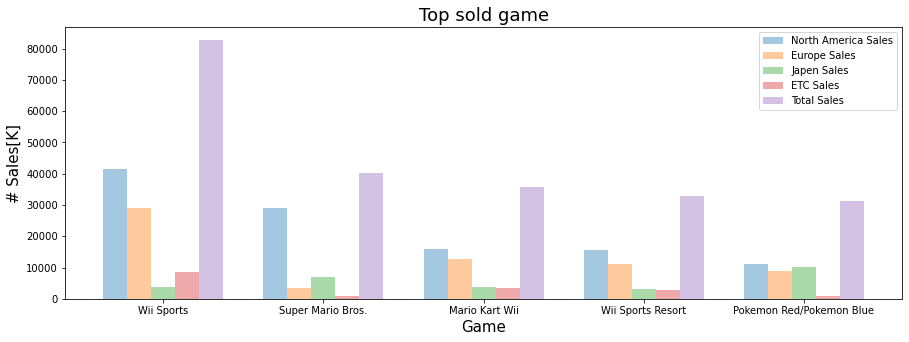

In [153]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(top_sales.Name[:5]))-0.3, top_sales.NA_Sales[:5], width=0.15, label='North America Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales.Name[:5]))-0.15, top_sales.EU_Sales[:5], width=0.15, label='Europe Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales.Name[:5])), top_sales.JP_Sales[:5], width=0.15, label='Japen Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales.Name[:5]))+0.15, top_sales.Other_Sales[:5], width=0.15, label='ETC Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales.Name[:5]))+0.3, top_sales.Total_Sales[:5], width=0.15, label='Total Sales', alpha=0.4)
plt.xticks(np.arange(len(top_sales.Name[:5])),top_sales.Name[:5])

plt.legend()
plt.xlabel('Game', fontsize=15)
plt.ylabel('# Sales[K]', fontsize=15)
plt.title('Top sold game', fontsize=18)
plt.savefig('Top_sold_game.png')

In [68]:
top_sales_x_nintendo=data[data.Publisher != 'Nintendo'].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head(50)
top_sales_x_nintendo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970,4940,240,1670,21820
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010,9270,970,4140,21390
2,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430,400,410,10570,20810
3,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630,5310,60,1380,16380
4,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8410,5490,470,1780,16150
5,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6850,5090,1870,1160,14970
6,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030,4280,130,1320,14760
7,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670,3730,110,1130,14640
8,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5770,5810,350,2310,14240
9,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4990,5880,650,2520,14040


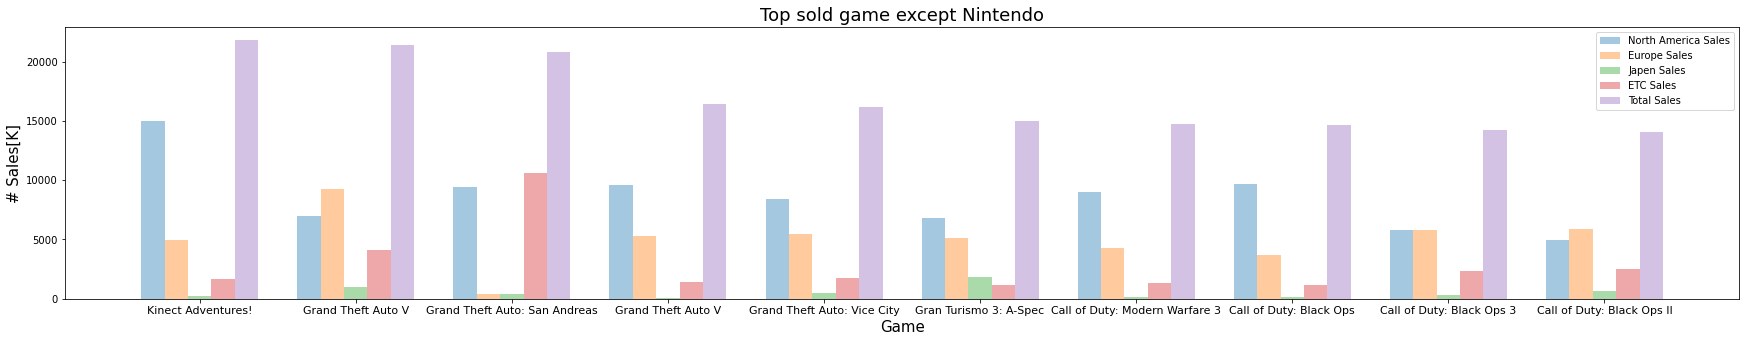

In [158]:
plt.figure(figsize=(30,5))
plt.bar(np.arange(len(top_sales_x_nintendo.Name[:10]))-0.3, top_sales_x_nintendo.NA_Sales[:10], width=0.15, label='North America Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales_x_nintendo.Name[:10]))-0.15, top_sales_x_nintendo.EU_Sales[:10], width=0.15, label='Europe Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales_x_nintendo.Name[:10])), top_sales_x_nintendo.JP_Sales[:10], width=0.15, label='Japen Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales_x_nintendo.Name[:10]))+0.15, top_sales_x_nintendo.Other_Sales[:10], width=0.15, label='ETC Sales', alpha=0.4)
plt.bar(np.arange(len(top_sales_x_nintendo.Name[:10]))+0.3, top_sales_x_nintendo.Total_Sales[:10], width=0.15, label='Total Sales', alpha=0.4)
plt.xticks(np.arange(len(top_sales_x_nintendo.Name[:10])),top_sales_x_nintendo.Name[:10],fontsize=11)

plt.legend()
plt.xlabel('Game', fontsize=15)
plt.ylabel('# Sales[K]', fontsize=15)
plt.title('Top sold game except Nintendo', fontsize=18)
plt.savefig('Top sales except Nintendo.png')

# 5 결론

1. 일본 시장을 제외하고는 시장은 게임 선호도가 유사하다
2. 연도별로 게임의 트렌드는 변화하며 최근인 2010 년대에 들어서는 액션, 슈팅, 스포츠, 롤플레잉 게임 장르의 판매량이 높다
3. 닌텐도에서 만든 게임의 판매량이 높으며 닌텐도 제작 게임을 제외하고는 GTA, Call of Duty 등 액션 슈팅 시리즈 게임들의 판매량이 높다
4. 출고 량이 높은 게임들은 북미 시장에서 판매량이 높다
5. PC 판매량 보다는 콘솔 게임의 판매량이 더 우수하다

- 다음 게임은 북미시장을 타겟으로 하는 액션/슈팅 장르의 게임을 개발해야 하며, 시리즈로의 제작을 고려하고 기획해야한다. 또한 콘솔 게임으로 개발하는것이 유리하다.

-----

In [70]:
from matplotlib.font_manager

matplotlib.font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')

SyntaxError: invalid syntax (90817094.py, line 1)